In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [66]:
def plotReceivers(rec1,rec2,var_array):
    fig,ax= plt.subplots(len(var_array),1,figsize=(10,5*len(var_array)))
    if type(ax) != type(np.ndarray((1))):
        ax = [ax]
            
    for i in range(0,len(var_array)):
        ax[i].plot(rec1["time"],rec1[var_array[i]])
        ax[i].plot(rec2["time"],rec2[var_array[i]])
    plt.show()
    

In [6]:
def readAcousticsReceiver(path):
    return readReceiver(path,["time","time1","p","u","v","rho","c"])

def readElasticsReceiver(path):
    return readReceiver(path,["time","time1","u","v","sigma_xx","sigma_yy","sigma_xy"])

def readReceiver(path,columns):
    rec = pd.read_csv(path)
    rename_map = { rec.columns[i]:columns[i] for i in range(len(columns)) }
    rec = rec.rename(columns = rename_map)
    return rec

# Task 0 Acoustics

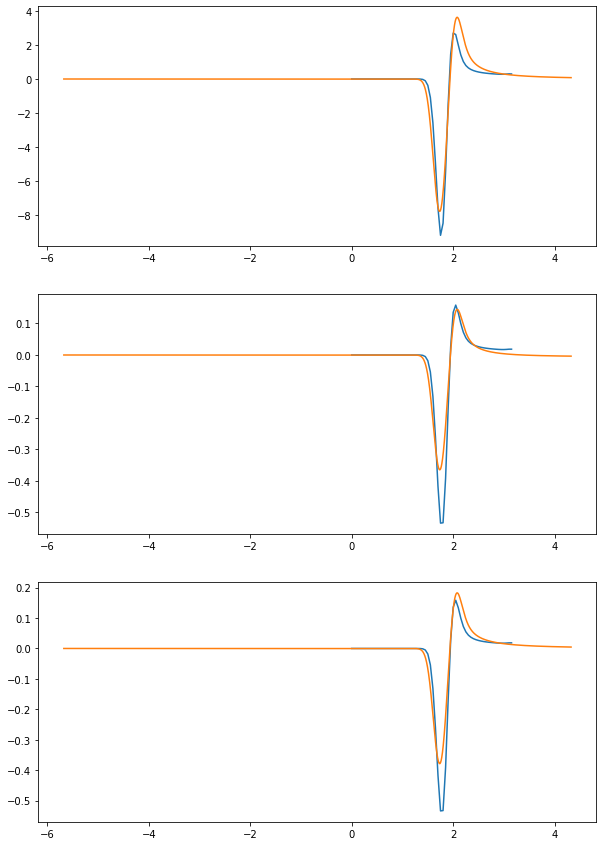

In [67]:
#set the absolute path to the receiver you want to plot
path_exa="../Applications/Acoustics/receiver.probe"
df_exa = readAcousticsReceiver(path_exa)

path_ref="Reference/Acoustics/receiver.csv"
df_ref = pd.read_csv(path_ref)

plotReceivers(df_exa,df_ref,var_array=["p","u","v"])

# Task 1 Elastics Gaussian

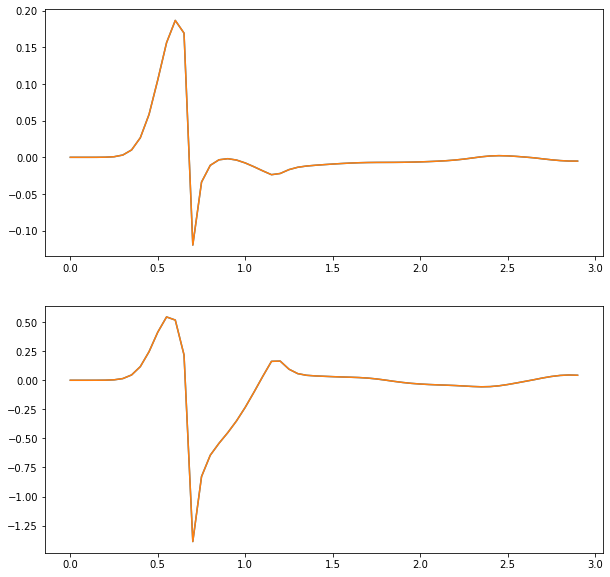

In [85]:
#set the absolute path to the receiver you want to plot
path_exa="../Applications/Elastics/receiver.probe".format(rec)
df_exa = readAcousticsReceiver(path_exa)

#path_ref="Reference/Elastics/Hhs/receiver{}.csv".format(rec)
#df_ref = pd.read_csv(path_ref)

plotReceivers(df_exa,df_exa,var_array=["u","v"])

# Task 2 Homgeneous Half Space

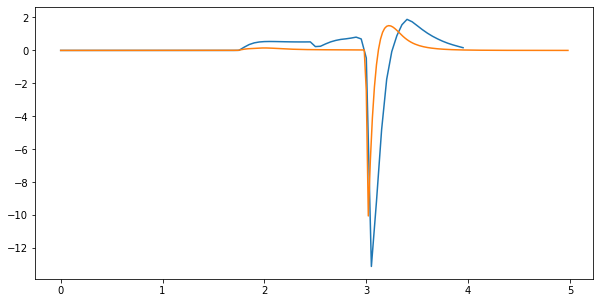

In [69]:
#set the absolute path to the receiver you want to plot
rec=3
path_exa="../Applications/Elastics/receiver_{}.probe".format(rec)
df_exa = readAcousticsReceiver(path_exa)

path_ref="Reference/Elastics/Hhs/receiver{}.csv".format(rec)
df_ref = pd.read_csv(path_ref)

plotReceivers(df_exa,df_ref,var_array=["u",])